In [1]:

#https://github.com/ekehoe32/orthrus
import sys
sys.path.append('/home/katrina/a/mankovic/ZOETIS/Fall2021/Orthrus/orthrus')
import orthrus
from orthrus import core
from orthrus.core import dataset
import numpy as np
import graph_tools_construction as gt
from matplotlib import pyplot as plt
import pandas
from orthrus.core.pipeline import *
from sklearn.preprocessing import FunctionTransformer
from orthrus.preprocessing.imputation import HalfMinimum
from sklearn.pipeline import make_pipeline
from sklearn.decomposition import PCA

import os
from sklearn.preprocessing import StandardScaler

from SpectralClustering import SpectralClustering
  


# C1

In [2]:
dataroot = '/data4/mankovic/'

# featuresets = ['ifr', 'sce', 'combined']
featuresets = ['ifr']

# comparisons = ['correlation', 'zobs', 'heatkernel']
comparisons = ['correlation']

ds = dataset.load_dataset(os.path.join('/data4/zoetis/Data/TPM_C1_Z34_Z40_Z42_Z75.ds'))
sample_ids  = ds.metadata['Project'] == 'C1'

for featureset_id in featuresets:
    print('---------------------------------')
    print(f'featureset {featureset_id}')

    feature_ids = dataset.load_dataset('/data4/zoetis/shared/mank_experiments/C1/featuresets/C1_Top50_SSVM_Genes.p') #change this
    randIDs= list(feature_ids)


    C1_dataset = ds.slice_dataset(sample_ids=sample_ids, feature_ids=randIDs)


    preprocessing_transform = make_pipeline(HalfMinimum(missing_values=0), FunctionTransformer(np.log2), StandardScaler())
    C1_data = pandas.DataFrame(data = preprocessing_transform.fit_transform(C1_dataset.data), columns = C1_dataset.data.columns, index = C1_dataset.data.index)

    #attribute used for classification labels
    supervised_attr = 'Diagnosis'

    #attribute used for leave-one-group-out cross validation
    group_attr = 'AnimalID'

    all_randids = list(C1_data.columns)

    healthy_seqID = list(C1_dataset.metadata.query("Diagnosis == 'healthy'").index)
    ad_seqID = list(C1_dataset.metadata.query("Diagnosis != 'healthy'").index)
    print(str(len(healthy_seqID))+' healthy and ' +str(len(ad_seqID))+' AD')
    sorted_X = np.vstack([np.array(C1_data.loc[ad_seqID]), np.array(C1_data.loc[healthy_seqID])])

    seqID_labels = len(ad_seqID)*['AD']+len(healthy_seqID)*['Healthy']

    ii = 0

    for compare in comparisons:

        my_sc = SpectralClustering(similarity = compare)

        binary_labels = np.zeros(len(seqID_labels))
        AD_idx = np.where(np.array(seqID_labels) == 'AD')
        binary_labels[AD_idx] = 1
        my_sc.fit(sorted_X, binary_labels)

        nodes, bsrs = my_sc.transform(sorted_X, binary_labels, loo = True, fiedler = True)

---------------------------------
featureset ifr
11 healthy and 13 AD
branch 2
branch 3
branch 4


In [6]:
len(nodes[2])

14

In [4]:
all_them = []
for n in nodes:
    all_them += list(n)

In [5]:
len(all_them)

21

In [ ]:
all_randids

In [2]:
# ds = dataset.load_dataset(os.path.join('/data4/zoetis/Data/TPM_C1_Z34_Z40_Z42_Z75.ds'))
# sample_ids  = ds.metadata['Project'] == 'C1'


# feature_ids = pd.read_csv('/data4/zoetis/Decks/March_2_2022/results/ssvm_ifr_feature_sets/C1_top_50_ssvm_ifr_features.csv', index_col = 0)
# randIDs= list(feature_ids.index)

# C1_dataset = ds.slice_dataset(sample_ids=sample_ids, feature_ids=randIDs)


# preprocessing_transform = make_pipeline(HalfMinimum(missing_values=0), FunctionTransformer(np.log2), StandardScaler())
# C1_data = pandas.DataFrame(data = preprocessing_transform.fit_transform(C1_dataset.data), columns = C1_dataset.data.columns, index = C1_dataset.data.index)

# #attribute used for classification labels
# supervised_attr = 'Diagnosis'

# #attribute used for leave-one-group-out cross validation
# group_attr = 'AnimalID'
  
# all_randids = list(C1_data.columns)


11 healthy and 13 AD


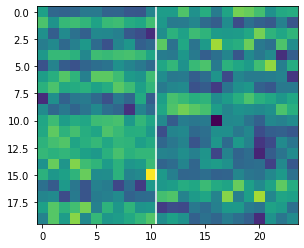

In [3]:
network_data = 'both'

#sick healthy sorted X
if network_data == 'both':
    healthy_seqID = list(C1_dataset.metadata.query("Diagnosis == 'healthy'").index)
    ad_seqID = list(C1_dataset.metadata.query("Diagnosis != 'healthy'").index)
    print(str(len(healthy_seqID))+' healthy and ' +str(len(ad_seqID))+' AD')
    sorted_X = np.vstack([np.array(C1_data.loc[healthy_seqID]), np.array(C1_data.loc[ad_seqID])])
    plt.imshow(sorted_X[:,:20].T)
    plt.axvline(len(healthy_seqID)-.5,  color = 'white')
    plt.show()
    seqID_labels = len(healthy_seqID)*['Healthy']+len(ad_seqID)*['AD']
else:
    sorted_X = np.array(C1_data)

In [4]:
sorted_X.shape

(24, 50)

In [5]:
my_sc = SpectralClustering(similarity = compare)

In [6]:
binary_labels = np.zeros(len(seqID_labels))
AD_idx = np.where(np.array(seqID_labels) == 'AD')
binary_labels[AD_idx] = 1
my_sc.fit(sorted_X, binary_labels)

In [7]:
nodes, bsrs = my_sc.transform(sorted_X, binary_labels, loso = True, fiedler = True)

branch 2
branch 3
branch 4
branch 5
branch 6
branch 7
branch 8
branch 9
branch 10


In [8]:
nodes, bsrs

([array([10]),
  array([ 0,  8,  9, 18, 38]),
  array([12, 17, 30, 40, 41, 47]),
  array([13]),
  array([11]),
  array([33]),
  array([23, 28, 29, 31, 43]),
  array([ 1,  5, 44]),
  array([7])],
 [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0])